In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [83]:
complaints_path = 'data/allegations_202007271729.csv'
layout_path = 'data/CCRB Data Layout Table.xlsx'
layout = pd.read_excel(layout_path)
complaints = pd.read_csv(complaints_path)
complaints.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,078 PCT,POM,POM,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,PBBS,POM,POM,Police Officer,Police Officer,White,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,078 PCT,POF,POF,Police Officer,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [84]:
layout.drop(columns = "glossary")

,field name,description
0,unique_mos_id,"unique ID of the officer (""member of service"")"
1,first_name,Officer's first name
2,last_name,Officer's last name
3,command_now,Officer's command assignment as of July 2020
4,complaint_id,Unique ID of the complaint
5,month_received,Month the complaint was received by CCRB
6,year_received,Year the complaint was received by CCRB
7,month_closed,Month the complaint investigation was closed b...
8,year_closed,Year the complaint investigation was closed by...
9,command_at_incident,Officer's command assignment at the time of th...


In [85]:
complaint_times = complaints[['month_received', 'year_received', 'month_closed', 'year_closed']]
display(complaint_times)
complaint_times.info()

,month_received,year_received,month_closed,year_closed
0,7,2019,5,2020
1,11,2011,8,2012
2,11,2011,8,2012
3,7,2012,9,2013
4,8,2018,2,2019
...,...,...,...,...
33353,8,2016,2,2017
33354,8,2016,2,2017
33355,8,2016,2,2017
33356,8,2016,2,2017


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   month_received  33358 non-null  int64
 1   year_received   33358 non-null  int64
 2   month_closed    33358 non-null  int64
 3   year_closed     33358 non-null  int64
dtypes: int64(4)
memory usage: 1.0 MB


In [86]:
time_labels = [('month_received', 'year_received'), ('month_closed', 'year_closed')]
times = []

for label in time_labels:
    times += [pd.to_datetime(complaint_times[label[0]].apply(lambda month: "0" + str(month) if len(str(month)) == 1 else str(month)) + "/" + complaint_times[label[1]].astype(str), format="%m/%Y")]

complaints = complaints.assign(date_received = times[0]).assign(date_closed = times[1]).drop(columns = complaint_times.columns)

In [87]:
complaints['days_taken'] = (complaints['date_closed'] - complaints['date_received']).dt.days
complaints.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,command_at_incident,rank_abbrev_incident,rank_abbrev_now,rank_now,rank_incident,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,date_received,date_closed,days_taken
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,078 PCT,POM,POM,Police Officer,Police Officer,Hispanic,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),2019-07-01,2020-05-01,305
1,10007,John,Sears,078 PCT,5952,24601,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),2011-11-01,2012-08-01,274
2,10007,John,Sears,078 PCT,5952,24601,PBBS,POM,POM,Police Officer,Police Officer,White,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),2011-11-01,2012-08-01,274
3,10007,John,Sears,078 PCT,5952,26146,PBBS,POM,POM,Police Officer,Police Officer,White,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),2012-07-01,2013-09-01,427
4,10009,Noemi,Sierra,078 PCT,24058,40253,078 PCT,POF,POF,Police Officer,Police Officer,Hispanic,F,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),2018-08-01,2019-02-01,184


In [88]:
complaints['days_taken'].describe()

count    33358.000000
mean       296.268721
std        152.703275
min          0.000000
25%        183.000000
50%        303.000000
75%        396.000000
max       3348.000000
Name: days_taken, dtype: float64

<AxesSubplot:xlabel='days_taken', ylabel='complainant_age_incident'>

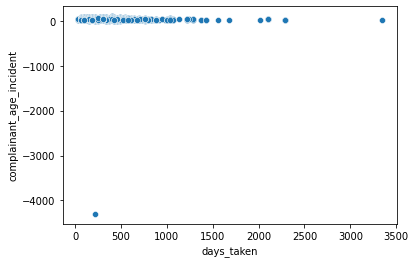

In [89]:
sns.scatterplot(data = complaints, x = complaints['days_taken'], y = 'complainant_age_incident')

In [90]:
complaints[['complainant_age_incident', 'mos_age_incident']].describe()

,complainant_age_incident,mos_age_incident
count,28546.000000,33358.000000
mean,32.484201,32.346873
std,28.408963,6.040944
min,-4301.000000,20.000000
25%,23.000000,28.000000
50%,30.000000,31.000000
75%,41.000000,36.000000
max,101.000000,60.000000


In [91]:
complaints[complaints['complainant_age_incident'] <= 0] = np.nan
complaints['complainant_age_incident'].min()

1.0

Correlation between duration of complaint and age of complainant: -0.08829041205291156


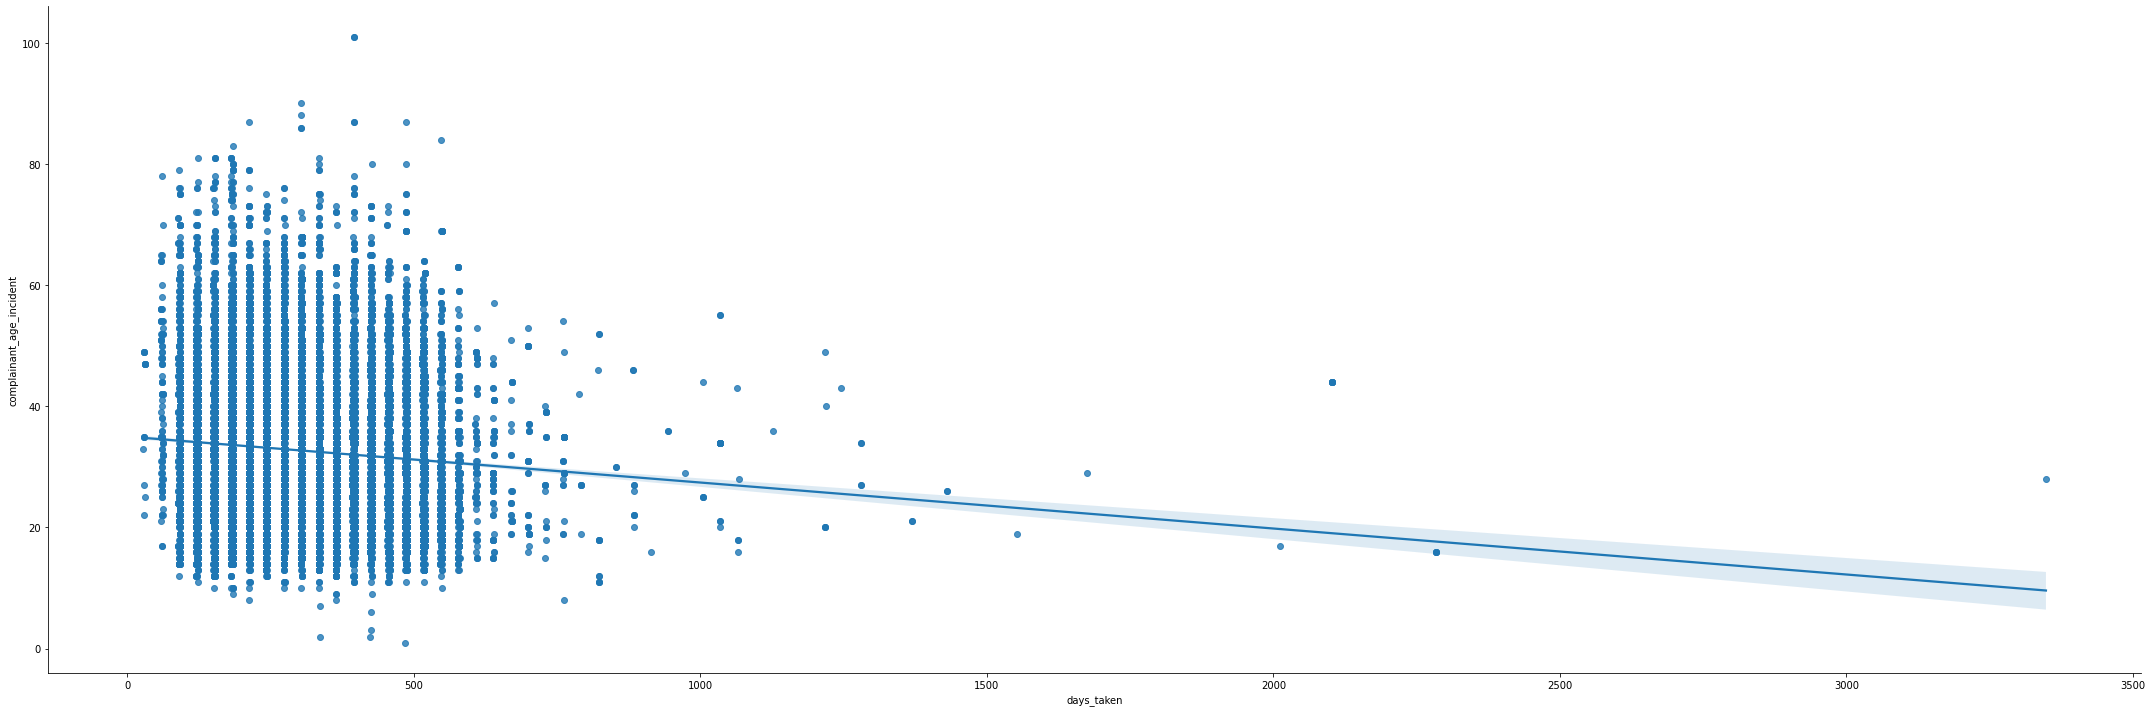

In [92]:
sns.lmplot(data = complaints, x = "days_taken", y = 'complainant_age_incident', height = 10, aspect = 3)
print("Correlation between duration of complaint and age of complainant: {}".format(complaints.corr().loc['days_taken', 'complainant_age_incident']))

Clean qualitative columns

In [93]:
small_qualitative_features = complaints.nunique()[complaints.nunique() < 25]
small_qualitative_features

rank_abbrev_incident     18
rank_abbrev_now          20
rank_now                  8
rank_incident             8
mos_ethnicity             5
mos_gender                2
complainant_ethnicity     8
complainant_gender        6
fado_type                 4
outcome_description      23
board_disposition        11
dtype: int64

In [94]:
complaints = complaints.drop(columns = ['rank_abbrev_incident', 'rank_abbrev_now', 'unique_mos_id'])

In [96]:
for feature in small_qualitative_features.index:
    print("{}'s unique values are: {}".format(feature, complaints[feature].unique()), end='\n\n')

KeyError: 'rank_abbrev_incident'

In [ ]:
complaints = complaints.assign(complainant_ethnicity = complaints['complainant_ethnicity'].replace({"Refused": np.nan, 'Unknown': np.nan, 'Other Race': np.nan}))
complaints['complainant_ethnicity'].unique()

array(['Black', nan, 'White', 'Asian', 'Hispanic', 'American Indian'],
      dtype=object)